### Задание 1. Визуализация ЦПТ в форме Леви.

Пусть {$\xi_n$} - независимые одинаково распределенные случайные величины, $ 0 < \mathsf{D}\xi < \infty$. Обозначим $S_n = \sum_{i = 1}^{n} \xi_i$. Тогда 
$$
\overline{S_n} = \frac{S_n - \mathsf{E}S_n}{\sqrt{\mathsf{D}S_n}} \xrightarrow[n \rightarrow \infty]{\mathsf{d}} N(0,1)
$$

Рассмотрим {$\xi_n$} - независимые случайные величины, имеющие экспоненциальное распределение с параметром $\lambda$. 
$$
\mathsf{p}_{\xi_n}(x) = \lambda e^{-\lambda x}, x \geq 0
$$
$$
\mathsf{E}\xi_i = \lambda^{-1}
$$
$$
\mathsf{D}\xi_i = \mathsf{E}\xi_i^2 - (\mathsf{E}\xi_i)^2 = \lambda^{-2}
$$

$$
\mathsf{E} S_n = \sum_{i = 1}^{n} \mathsf{E}\xi_i = n\lambda^{-1}
$$
Так как $\xi_i$ - независимые, то
$$
\mathsf{D} S_n = \sum_{i = 1}^{n} \mathsf{D}\xi_i = n\lambda^{-2}
$$

По критерию сходимости по распределению известно, что 
последовательность случайных величин {$\xi_n$} сходится по распределению к случайной величине $\xi$ тогда и только тогда, когда для любого x из множества точек непрерывности функции распределения $F_{\xi}$ выполнено $F_{\xi_n} \rightarrow F_{\xi}$ при $n \rightarrow \infty$.

То есть, для визуализации ЦПТ мы можем посмотреть на "сходимость" графика $\overline{S_n}$ к графику нормального распределения.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
%matplotlib inline

Создадим случайную величину с экспоненциальным распределением и случайную величину с нормальным распределением.

In [2]:
expon_dist = sts.expon()
norm_dist = sts.norm(0, 1)

Определим функцию, генерирующую выборку случайных величин Sn с чертой размера num_of_sn.

In [3]:
def sn_variable(dist, n, num_of_sn):
    var = dist.var()
    disp = np.square(dist.std())
    sample = [(np.sum(dist.rvs(n)) - var*n) / np.sqrt(disp * n) for i in range(num_of_sn)]
    return sample

Попробуем оценить сходство нашей полученной плотности с плотностью нормального распределения. Определим функцию, рисующую графики плотности нормально распределения и плотность распределения s_n с чертой по 3 в строке.

In [4]:
def clt_visualization(dist, n, num_of_sn, plot_num):
    # Рисует графики плотности нормального распределения и  получившуюся плотность распределения s_n с чертой
    sample = sn_variable(expon_dist, n, num_of_sn)
    plt.hist(sample, density=True, bins=50)
    x = np.linspace(-3, 3, 1000)
    plt.subplot(4, 3, plot_num)
    plt.plot(x, norm_dist.pdf(x), label='Плотность нормального распределения')
    plt.ylabel('Плотность')
    plt.xlabel('x')
    plt.title("n = {}, Количество Sn = {}".format(str(n), str(num_of_sn)))
    plt.legend(loc='upper right')

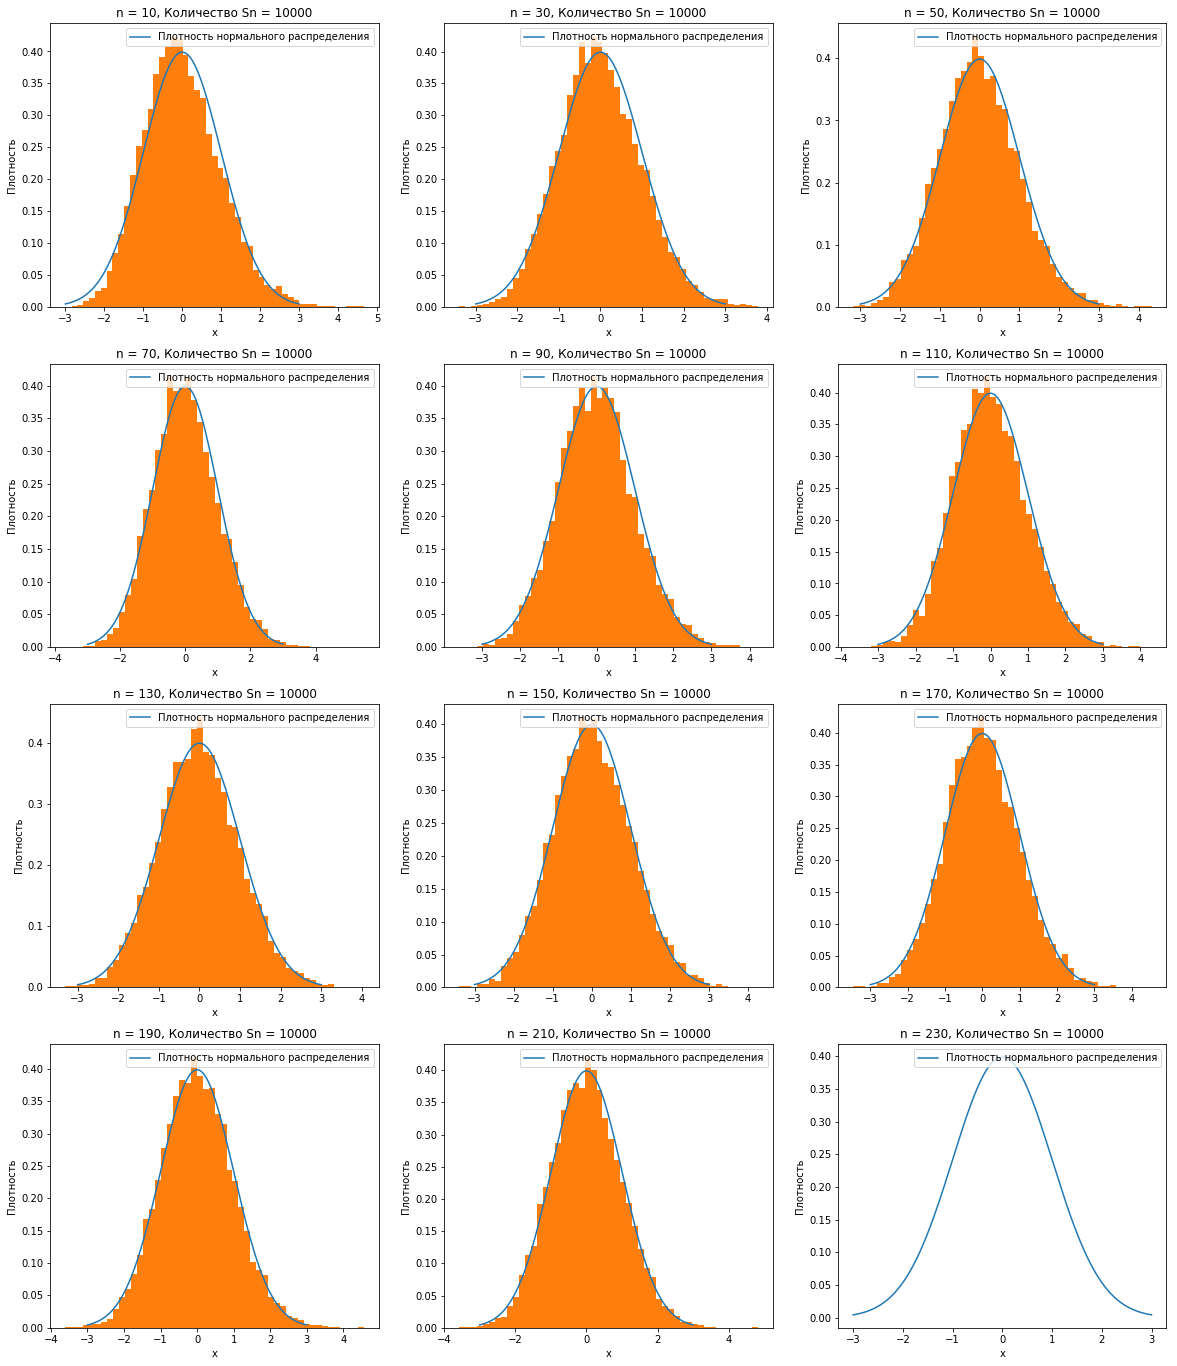

In [5]:
plt.figure(figsize=(20,24))
for i in range(12):
    clt_visualization(expon_dist, 20 * i + 10, 10000, i + 1)

Как можно видеть, гистограмма очень напоминает график плотности нормального распределения

Как видно из графиков, при $n \rightarrow \infty$, график плотности распределения $\overline{S_n}$ становится все ближе к графику плотности нормального распределения.

То есть, на основании графиков, можно предположить, что плотность распределения $\overline{S_n}$ стремится к плотности нормального распределения.

Фактически, мы продемонстрировали локальную ЦПТ. При условиях ЦПТ в форме Леви, если {$\xi_i$} - абсолютно непрерывные, то плотность $\overline{S_n}$ стремится к плотности $N(0,1)$

### Задание 2. Свертка функций на примере.

Перед нами стоит задача вычислить, какая масса снега будет будет лежать на земле ко времени $t$. Обозначим ее за $m(t)$. Для простоты рассмотрим дискретный случай - т.е. снег выпадает раз в час. Таять же снег может произвольным образом.

Пусть мы построили две зависимости: $g(x)$ - количество выпавшего снега в зависимости от времени, $f(x)$ - доля нерастаявшего снега через время $x$ после его выпадения.

In [6]:
values = [0, 30, 10, 5, 60, 30, 10, 0, 0, 30, 30, 30, 30]
# values[i] - выпавший снег в i-й час

def g(x):
    if x < 0 or x >= 13:
        return 0
    return values[x]

def f(x):
    if x < 0:
        return 0
    return 1 / (1 + 0.5 * x) # подобрали любую убывающую функцию

In [7]:
# строим график g(x)
times = range(len(values))
labels = [str(i) for i in range(len(values))]
_, ax = plt.subplots()
rects = ax.bar(times, values)
ax.set_xticks([time for time in times])
ax.set_xticklabels(labels) 
plt.ylabel('Масса выпавшего снега')
plt.xlabel('Время')

Text(0.5,0,'Время')

Text(0.5,0,'Время')

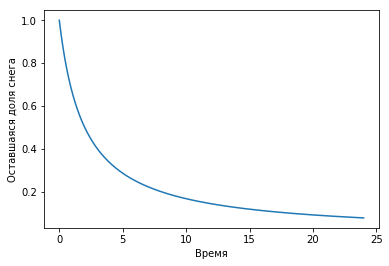

In [8]:
# строим график f(x)
x = np.linspace(0, 24, 1000)
y = [f(x_) for x_ in x]
plt.plot(x, y)
plt.ylabel('Оставшаяся доля снега')
plt.xlabel('Время')

Для получения количества общего количества оставшегося снега на участке нам достаточно 2 этих функций, остается лишь правильно с ними работать.

#### Именно здесь нам и поможет свертка.

К моменту $t$ кучки снега, выпавшие в разное время, расстаяли по-разному. Получается, для различных по времени выпадения кучек снега нужно рассматривать различную долю расстаявшего снега ко времени $t$, а далее просуммировать получившиеся массы оставшегося снега.

Для свёртки нужно привести функции $f(x)$ и $g(x)$ к одному аргументу (изначально их аргументы - различное время, т.к. $g(x)$ - снег, который выпал в момент $x$, а $f(x)$ - доля нерасстаявшего снега в кучке через время $x$ после выпадения этой кучки).

Перейдем к новому времени - $\tau$. $g(\tau)$ - по-прежнему масса снега, выпавшего в момент времени $\tau$. А соответствующий аргументу функции $g$ аргумент для функции $f$ теперь $t - \tau$.

Что теперь мы получим, умножив $g(\tau)$ на $f(t - \tau)$? Мы получаем количество нерастаявшего снега к моменту $t$, выпавшего в момент $\tau$.
И для ответа на вопрос задачи теперь достаточно просуммировать (в нашем дискретном случае) такие выражения для каждого натурального $\tau$ (если рассматриваем один день, то для $\tau$ от 0 до 24). Т.е. ответ принимает вид:
$$
m(t) = \sum_{\tau = 0}^{24} g(\tau)*f(t - \tau)
$$
Полученное выражение и называется сверткой (в нашем конкретном случае, при $g$, отличной от нуля только в  целых числах от 0 до 24).

In [9]:
def m(t):
    return np.sum([g(r)*f(t - r) for r in range (24)])

In [10]:
def m_hours(t, num_of_fall):
    # вспомогательная функция, рассматриваем первые num выпадений снега
    return np.sum([g(r)*f(t - r) for r in range (num_of_fall + 1)])

In [11]:
from matplotlib import colors as mcolors


colors = tuple(dict(**mcolors.CSS4_COLORS)) # получили кортеж кодов всех цветов для наглядной демонстрации
x = np.linspace(0, 24, 50)
y = [[m_hours(x_, n) for x_ in x] for n in range(14)]
for i in range(13):
    if i == 12:
        plt.fill_between(x, [0 for j in range(50)], y[0], color=colors[4*i + 1], label=str(0))
        break
    plt.fill_between(x, y[13-i-1], y[13-i-2], color=colors[4*i + 1], label=str(13 - i - 1))
plt.legend()
plt.ylabel('Масса снега')
plt.xlabel('Время')

Text(0.5,0,'Время')